# House Price Index Neural Network

In [1]:
#https://github.com/fastai/fastai/blob/master/courses/dl1/lesson3-rossman.ipynb
from fastai.fastai.structured import *
from fastai.fastai.column_data import *

PATH = 'data/'

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',  500)
pd.set_option('display.width', 1000)

### Y-Norm

In [96]:
data = pd.read_feather(PATH + 'data')
print('Size of row %s' % len(data.iloc[0]))
print('Size of data %s' % len(data))

Size of row 50
Size of data 556402


In [97]:
data[:2]

,price,propertyType,oldNew,duration,PAON,District,CURRENT_ENERGY_EFFICIENCY,BUILT_FORM,LOCAL_AUTHORITY,CONSTITUENCY,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,LIGHTING_COST_CURRENT,HEATING_COST_CURRENT,HOT_WATER_COST_CURRENT,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,MAIN_HEATING_CONTROLS,GLAZED_TYPE,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,FLOOR_DESCRIPTION,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,ROOF_DESCRIPTION,MAINHEAT_DESCRIPTION,MAINHEATCONT_DESCRIPTION,LIGHTING_DESCRIPTION,MAIN_FUEL,HEAT_LOSS_CORRIDOOR,MECHANICAL_VENTILATION,postcodeDistrict,postcodeSector,yearOfTransfer,monthOfTransfer,lowerQuartile,upperQuartile,pricePerType,pricePerRegion,salesVolume
0,114500,S,N,F,35,barnet,80.0,Semi-Detached,E09000003,E14000741,rental (private),78.0,177.0,175.0,1.7,38.0,285.0,81.0,58.24,Single,Y,Ground,"Programmer, room thermostat and TRVs",double glazing installed during or after 2002,0.0,3.0,3.0,0.0,From main system,"Suspended, insulated (assumed)",Fully double glazed,Good,Good,"Solid brick, with internal insulation",(another dwelling above),"Boiler and radiators, mains gas","Programmer, room thermostat and TRVs",Low energy lighting in 75% of fixed outlets,mains gas - this is for backwards compatibilit...,no corridor,natural,NW7,NW7 3,1996,3,59950.0,130000.0,97079.3,91409.8,454.0
1,97000,T,N,F,6,enfield,52.0,Mid-Terrace,E09000010,E14000687,ECO assessment,44.0,338.0,76.0,5.0,73.0,893.0,133.0,83.00,Single,Y,None,"Programmer, no room thermostat",double glazing installed before 2002,1.0,3.0,3.0,0.0,From main system,"Suspended, no insulation (assumed)",Fully double glazed,Average,Average,"Solid brick, as built, no insulation (assumed)","Pitched, 50 mm loft insulation","Boiler and radiators, mains gas","Programmer, no room thermostat",Low energy lighting in 63% of fixed outlets,mains gas (not community),None,natural,N9,N9 9,2001,2,82125.0,151500.0,145438.0,127577.4,411.0


In [99]:
data['priceNorm'] = (data['price']-data['pricePerRegion'])/data['pricePerRegion'] + 1
data['priceNorm'] = data['priceNorm'].astype('float32')
data = data.drop('price', axis=1)

### Embedding

In [100]:
data[:2]

,propertyType,oldNew,duration,PAON,District,CURRENT_ENERGY_EFFICIENCY,BUILT_FORM,LOCAL_AUTHORITY,CONSTITUENCY,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,LIGHTING_COST_CURRENT,HEATING_COST_CURRENT,HOT_WATER_COST_CURRENT,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,MAIN_HEATING_CONTROLS,GLAZED_TYPE,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,FLOOR_DESCRIPTION,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,ROOF_DESCRIPTION,MAINHEAT_DESCRIPTION,MAINHEATCONT_DESCRIPTION,LIGHTING_DESCRIPTION,MAIN_FUEL,HEAT_LOSS_CORRIDOOR,MECHANICAL_VENTILATION,postcodeDistrict,postcodeSector,yearOfTransfer,monthOfTransfer,lowerQuartile,upperQuartile,pricePerType,pricePerRegion,salesVolume,priceNorm
0,S,N,F,35,barnet,80.0,Semi-Detached,E09000003,E14000741,rental (private),78.0,177.0,175.0,1.7,38.0,285.0,81.0,58.24,Single,Y,Ground,"Programmer, room thermostat and TRVs",double glazing installed during or after 2002,0.0,3.0,3.0,0.0,From main system,"Suspended, insulated (assumed)",Fully double glazed,Good,Good,"Solid brick, with internal insulation",(another dwelling above),"Boiler and radiators, mains gas","Programmer, room thermostat and TRVs",Low energy lighting in 75% of fixed outlets,mains gas - this is for backwards compatibilit...,no corridor,natural,NW7,NW7 3,1996,3,59950.0,130000.0,97079.3,91409.8,454.0,1.252601
1,T,N,F,6,enfield,52.0,Mid-Terrace,E09000010,E14000687,ECO assessment,44.0,338.0,76.0,5.0,73.0,893.0,133.0,83.00,Single,Y,None,"Programmer, no room thermostat",double glazing installed before 2002,1.0,3.0,3.0,0.0,From main system,"Suspended, no insulation (assumed)",Fully double glazed,Average,Average,"Solid brick, as built, no insulation (assumed)","Pitched, 50 mm loft insulation","Boiler and radiators, mains gas","Programmer, no room thermostat",Low energy lighting in 63% of fixed outlets,mains gas (not community),None,natural,N9,N9 9,2001,2,82125.0,151500.0,145438.0,127577.4,411.0,0.760323


In [101]:
catVariables = ['propertyType', 'oldNew', 'duration', 'PAON', 'District',
                'BUILT_FORM', 'LOCAL_AUTHORITY', 'CONSTITUENCY', 'TRANSACTION_TYPE', 
                'ENERGY_TARIFF','MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'MAIN_HEATING_CONTROLS',
               'GLAZED_TYPE', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
               'NUMBER_OPEN_FIREPLACES', 'HOTWATER_DESCRIPTION', 'FLOOR_DESCRIPTION',
               'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF',
               'WALLS_DESCRIPTION', 'ROOF_DESCRIPTION', 'MAINHEAT_DESCRIPTION',
                'MAINHEATCONT_DESCRIPTION', 'LIGHTING_DESCRIPTION', 
                'MAIN_FUEL', 'HEAT_LOSS_CORRIDOOR', 'MECHANICAL_VENTILATION',
               'postcodeDistrict', 'postcodeSector', 'yearOfTransfer', 'monthOfTransfer'
              ]
continVariables = ['CURRENT_ENERGY_EFFICIENCY', 'ENVIRONMENT_IMPACT_CURRENT',
                  'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL',
                  'CO2_EMISSIONS_CURRENT', 'LIGHTING_COST_CURRENT', 'HEATING_COST_CURRENT',
                  'HOT_WATER_COST_CURRENT', 'TOTAL_FLOOR_AREA', 'lowerQuartile',
                   'upperQuartile', 'pricePerType', 'pricePerRegion', 'salesVolume'
                  ]

print('No. categorical variables: %s' % len(catVariables))
print('No. continuous variables: %s' % len(continVariables))

No. categorical variables: 35
No. continuous variables: 14


In [102]:
for field in catVariables:
    data[field] = data[field].astype('category').cat.as_ordered()

In [103]:
for field in continVariables:
    data[field] = data[field].astype('float32')

In [104]:
n = len(data)
idxs = get_cv_idxs(n, val_pct=150000/n)
dataSamp = data.iloc[idxs].reset_index().drop('index', axis=1)
print('Length of sample: %s'%len(dataSamp))

Length of sample: 150000


In [105]:
dataSamp[:2]

,propertyType,oldNew,duration,PAON,District,CURRENT_ENERGY_EFFICIENCY,BUILT_FORM,LOCAL_AUTHORITY,CONSTITUENCY,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,LIGHTING_COST_CURRENT,HEATING_COST_CURRENT,HOT_WATER_COST_CURRENT,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,MAIN_HEATING_CONTROLS,GLAZED_TYPE,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,FLOOR_DESCRIPTION,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,ROOF_DESCRIPTION,MAINHEAT_DESCRIPTION,MAINHEATCONT_DESCRIPTION,LIGHTING_DESCRIPTION,MAIN_FUEL,HEAT_LOSS_CORRIDOOR,MECHANICAL_VENTILATION,postcodeDistrict,postcodeSector,yearOfTransfer,monthOfTransfer,lowerQuartile,upperQuartile,pricePerType,pricePerRegion,salesVolume,priceNorm
0,T,N,F,15,greenwich,76.0,Semi-Detached,E09000011,E14000718,marketed sale,74.0,162.0,157.0,3.2,93.0,453.0,114.0,118.309998,Single,Y,NaN,"Programmer, room thermostat and TRVs",double glazing installed during or after 2002,0.0,6.0,6.0,0.0,From main system,"Solid, no insulation (assumed)",Fully double glazed,Good,Good,"Cavity wall, as built, insulated (assumed)","Pitched, 300+ mm loft insulation","Boiler and radiators, mains gas","Programmer, room thermostat and TRVs",Low energy lighting in 50% of fixed outlets,mains gas - this is for backwards compatibilit...,NaN,natural,SE7,SE7 8,2007,5,170000.0,270000.0,282457.59375,225765.203125,419.0,1.040904
1,S,N,F,559,greenwich,59.0,Semi-Detached,E09000011,E14000690,marketed sale,55.0,252.0,66.0,4.1,66.0,771.0,110.0,86.000000,Single,Y,NaN,"Programmer, TRVs and bypass","double glazing, unknown install date",0.0,5.0,5.0,0.0,From main system,"Suspended, no insulation (assumed)",Fully double glazed,Average,Average,"Solid brick, as built, no insulation (assumed)","Pitched, 50 mm loft insulation","Boiler and radiators, mains gas","Programmer, TRVs and bypass",Low energy lighting in 71% of fixed outlets,mains gas (not community),NaN,natural,SE9,SE9 6,2003,10,118000.0,210000.0,267386.59375,173904.796875,419.0,1.023548


In [107]:
df, y, nas, mapper = proc_df(dataSamp, 'priceNorm', do_scale=True)
yl = np.log(y)

In [108]:
df[:2]

,propertyType,oldNew,duration,PAON,District,CURRENT_ENERGY_EFFICIENCY,BUILT_FORM,LOCAL_AUTHORITY,CONSTITUENCY,TRANSACTION_TYPE,ENVIRONMENT_IMPACT_CURRENT,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,CO2_EMISSIONS_CURRENT,LIGHTING_COST_CURRENT,HEATING_COST_CURRENT,HOT_WATER_COST_CURRENT,TOTAL_FLOOR_AREA,ENERGY_TARIFF,MAINS_GAS_FLAG,FLOOR_LEVEL,MAIN_HEATING_CONTROLS,GLAZED_TYPE,EXTENSION_COUNT,NUMBER_HABITABLE_ROOMS,NUMBER_HEATED_ROOMS,NUMBER_OPEN_FIREPLACES,HOTWATER_DESCRIPTION,FLOOR_DESCRIPTION,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,WALLS_DESCRIPTION,ROOF_DESCRIPTION,MAINHEAT_DESCRIPTION,MAINHEATCONT_DESCRIPTION,LIGHTING_DESCRIPTION,MAIN_FUEL,HEAT_LOSS_CORRIDOOR,MECHANICAL_VENTILATION,postcodeDistrict,postcodeSector,yearOfTransfer,monthOfTransfer,lowerQuartile,upperQuartile,pricePerType,pricePerRegion,salesVolume,lowerQuartile_na,upperQuartile_na,pricePerType_na,salesVolume_na
0,5,1,1,179,13,1.335155,7,14,28,6,1.414173,-0.185561,-0.121637,-0.138622,0.142510,-0.581682,-0.261290,0.186856,1,2,0,48,3,1,7,7,1,20,20,5,2,2,3,91,20,48,61,25,0,3,89,352,13,5,-0.088053,-0.297357,0.282285,-0.261687,0.167996,-0.002582,-0.002582,-0.086812,-0.026842
1,4,1,1,815,13,-0.029372,7,14,22,6,-0.049289,-0.171137,-0.149022,-0.137777,-0.298279,-0.007006,-0.321934,-0.116552,1,2,0,44,4,1,6,6,1,20,26,5,1,1,38,97,20,44,84,24,0,3,91,361,9,10,-0.594271,-0.533265,0.163808,-0.564153,0.167996,-0.002582,-0.002582,-0.086812,-0.026842


In [109]:
train_ratio = 0.75
train_size = int(len(dataSamp) * train_ratio)
val_idx = list(range(train_size, len(df)))

In [121]:
def inv_y(a): return np.exp(a)

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [125]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32),
                                      bs=128, cat_flds=catVariables)

In [113]:
cat_sz = [(c, len(dataSamp[c].cat.categories)+1) for c in catVariables]
cat_sz[:2]

[('propertyType', 6), ('oldNew', 3)]

In [114]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs[:2]

[(6, 3), (3, 2)]

In [129]:
m = md.get_learner(emb_szs, len(df.columns)-len(catVariables),
                  0.05, 1, [1000, 1000, 500], [0.001, 0.001, 0.05],
                  use_bn=True, y_range=y_range)
lr = 1e-3

In [130]:
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.357453   0.361547  



In [132]:
m = md.get_learner(emb_szs, len(df.columns)-len(catVariables),
                  0.05, 1, [1000, 1000, 500], [0.001, 0.001, 0.05],
                  use_bn=True, y_range=y_range)
lr = 1e-3

In [133]:
m.fit(lr, 2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.349374   0.361547  
    1      0.364864   0.361547                               



[0.36154658]

In [128]:
lr = 1e-4
m.fit(lr, 5, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.36365    0.361547  
    1      0.347822   0.361547                               
    2      0.372445   0.361547                               
    3      0.337216   0.361547                               
    4      0.364522   0.361547                               



[0.36154658]

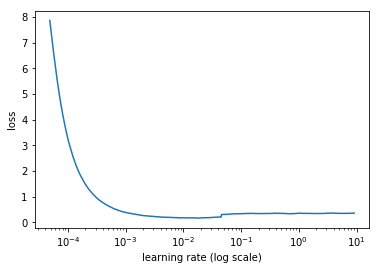

In [131]:
m.sched.plot(100)